In [91]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load dataset
file_path = '/content/data_hotel_booking_demand.csv'
data = pd.read_csv(file_path)

# Display first few rows of the dataset for initial exploration
data.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0


#**Data Understanding**

## Penjelasan Dataset

In [92]:
# Import library
import pandas as pd

# Load dataset
file_path = 'data_hotel_booking_demand.csv'
data = pd.read_csv(file_path)

# Tampilkan informasi dasar tentang dataset
print("Informasi Dataset:")
print(data.info())

# Tampilkan jumlah data (baris dan kolom)
print("\nJumlah data (baris, kolom):", data.shape)

# Tampilkan 5 baris pertama data
print("\n5 Baris Pertama Dataset:")
print(data.head())

# Statistik deskriptif untuk fitur numerikal
print("\nStatistik Deskriptif untuk Fitur Numerikal:")
print(data.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB
None

Jumlah data (baris, kolom): (83573, 11)

5 Baris Pertama Dataset:
  country

•	Total baris (rows): 83,573

•	Jumlah fitur (columns): 11 (10 fitur input + 1 target)

## Visualisasi Distribusi

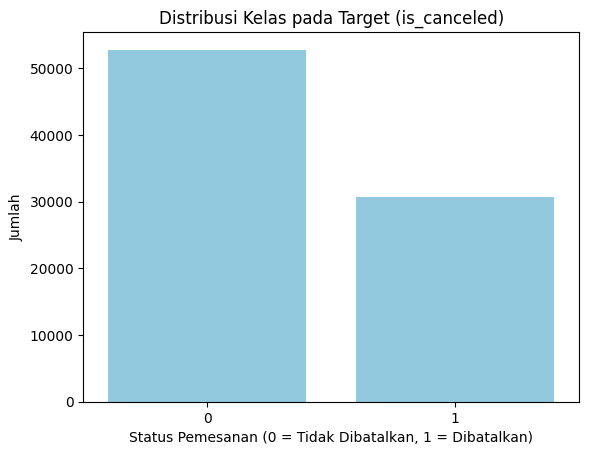

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas (Bar Chart)
sns.countplot(x=data['is_canceled'], color='skyblue')
plt.title("Distribusi Kelas pada Target (is_canceled)")
plt.xlabel("Status Pemesanan (0 = Tidak Dibatalkan, 1 = Dibatalkan)")
plt.ylabel("Jumlah")
plt.show()

**Bar Chart**
- Menunjukkan jumlah kelas is_canceled untuk kategori 0 (Not Canceled) dan 1 (Canceled).

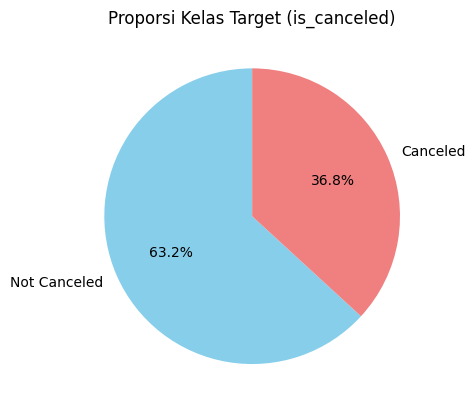

In [94]:
# Visualisasi distribusi kelas (Pie Chart)
data['is_canceled'].value_counts().plot.pie(
    autopct='%1.1f%%',
    labels=['Not Canceled', 'Canceled'],
    startangle=90,
    colors=['skyblue', 'lightcoral']
)
plt.title("Proporsi Kelas Target (is_canceled)")
plt.ylabel("")  # Menghilangkan label y untuk estetika
plt.show()

**Pie Chart**
- Menunjukkan proporsi kelas is_canceled dalam bentuk persentase.

# Data Preparation

## Penanganan Missing Value

In [95]:
# Cek ulang jumlah missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

country    351
dtype: int64


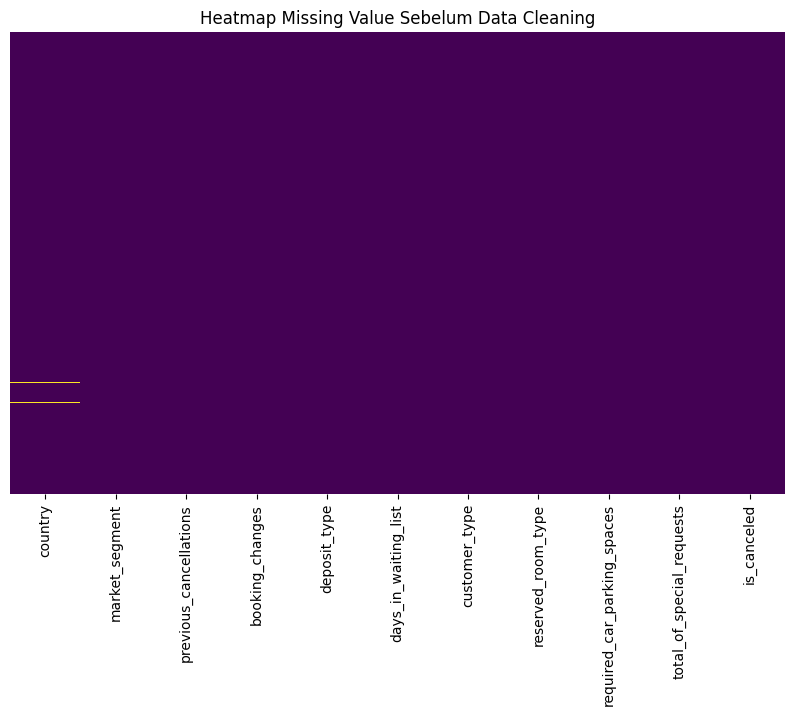

Jumlah Missing Values per Kolom:
country    351
dtype: int64


In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cek missing values
missing_values = data.isnull().sum()

# Visualisasi missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap Missing Value Sebelum Data Cleaning")
plt.show()

# Print jumlah missing values
print("Jumlah Missing Values per Kolom:")
print(missing_values[missing_values > 0])

In [97]:
# Fill missing values in 'country' with the mode (most frequent value)
data['country'] = data['country'].fillna(data['country'].mode()[0])

# Verify if missing values have been handled
missing_values = data.isnull().sum()

# Display missing values status
missing_values

,0
country,0
market_segment,0
previous_cancellations,0
booking_changes,0
deposit_type,0
days_in_waiting_list,0
customer_type,0
reserved_room_type,0
required_car_parking_spaces,0
total_of_special_requests,0


In [98]:
data.loc[:, 'country'] = data['country'].fillna(data['country'].mode()[0])

In [99]:
numerical_columns = [
    'previous_cancellations',
    'booking_changes',
    'days_in_waiting_list',
    'required_car_parking_spaces',
    'total_of_special_requests',
]

scaler = MinMaxScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

data.head()

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0.0,0.000000,No Deposit,0.0,Transient-Party,A,0.0,0.0,0
1,FRA,Online TA,0.0,0.000000,No Deposit,0.0,Transient,A,0.0,0.4,0
2,PRT,Online TA,0.0,0.047619,No Deposit,0.0,Transient,A,0.0,0.4,0
3,NLD,Online TA,0.0,0.000000,No Deposit,0.0,Transient,A,0.0,0.2,1
4,PRT,Online TA,0.0,0.095238,No Deposit,0.0,Transient,A,0.0,0.4,0


# Feature Engineering

## Pembuatan Fitur Baru

In [100]:
import numpy as np

# Transformasi log pada kolom days_in_waiting_list
data['log_days_in_waiting_list'] = np.log1p(data['days_in_waiting_list'])

# Verifikasi hasil
print(data[['days_in_waiting_list', 'log_days_in_waiting_list']].head())

   days_in_waiting_list  log_days_in_waiting_list
0                   0.0                       0.0
1                   0.0                       0.0
2                   0.0                       0.0
3                   0.0                       0.0
4                   0.0                       0.0


In [101]:
# Pastikan kolom log_days_in_waiting_list ada
print(data.columns)
if 'log_days_in_waiting_list' not in data.columns:
    print("Kolom log_days_in_waiting_list tidak ditemukan!")

Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled', 'log_days_in_waiting_list'],
      dtype='object')


## Penghapusan Fitur Tidak Relevan

In [102]:
print(data.columns)

Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled', 'log_days_in_waiting_list'],
      dtype='object')


In [103]:
missing_percentage = data.isnull().mean() * 100
print(missing_percentage)

country                        0.0
market_segment                 0.0
previous_cancellations         0.0
booking_changes                0.0
deposit_type                   0.0
days_in_waiting_list           0.0
customer_type                  0.0
reserved_room_type             0.0
required_car_parking_spaces    0.0
total_of_special_requests      0.0
is_canceled                    0.0
log_days_in_waiting_list       0.0
dtype: float64


In [104]:
columns_to_remove = ['agent', 'company']  # Daftar kolom yang ingin dihapus
columns_to_remove = [col for col in columns_to_remove if col in data.columns]  # Filter hanya kolom yang ada
data.drop(columns=columns_to_remove, inplace=True)

# Verifikasi hasil
print("Kolom setelah penghapusan:", data.columns)

Kolom setelah penghapusan: Index(['country', 'market_segment', 'previous_cancellations',
       'booking_changes', 'deposit_type', 'days_in_waiting_list',
       'customer_type', 'reserved_room_type', 'required_car_parking_spaces',
       'total_of_special_requests', 'is_canceled', 'log_days_in_waiting_list'],
      dtype='object')


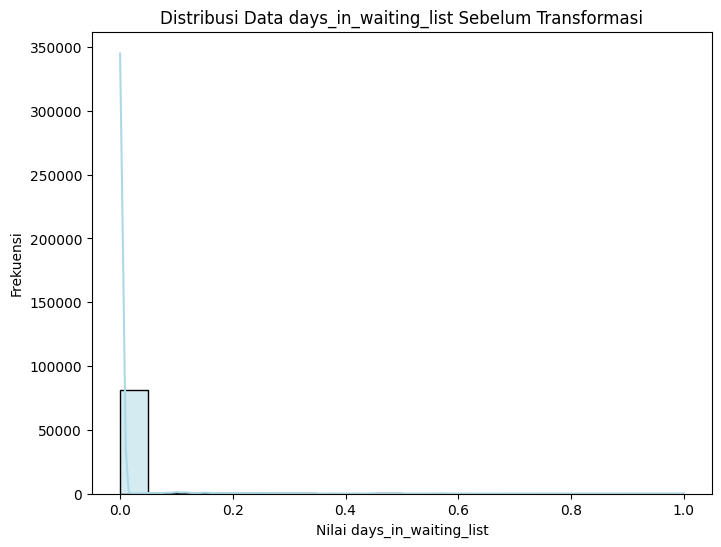

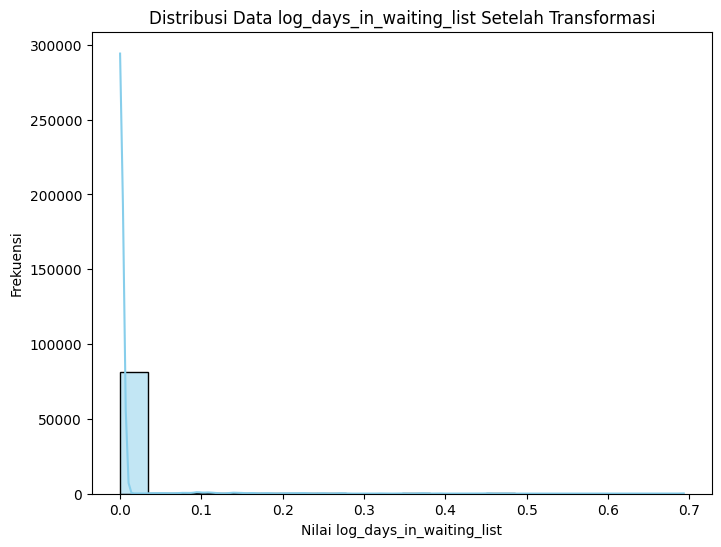

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi sebelum transformasi
plt.figure(figsize=(8, 6))
sns.histplot(data['days_in_waiting_list'], bins=20, kde=True, color='lightblue')
plt.title("Distribusi Data days_in_waiting_list Sebelum Transformasi")
plt.xlabel("Nilai days_in_waiting_list")
plt.ylabel("Frekuensi")
plt.show()

# Visualisasi setelah transformasi
plt.figure(figsize=(8, 6))
sns.histplot(data['log_days_in_waiting_list'], bins=20, kde=True, color='skyblue')
plt.title("Distribusi Data log_days_in_waiting_list Setelah Transformasi")
plt.xlabel("Nilai log_days_in_waiting_list")
plt.ylabel("Frekuensi")
plt.show()

## Transformasi data

- Log Transform: Untuk mengurangi skewness.
- Standarisasi: Untuk menyamakan skala fitur.
- Normalisasi: Untuk mengubah nilai ke skala [0,1].

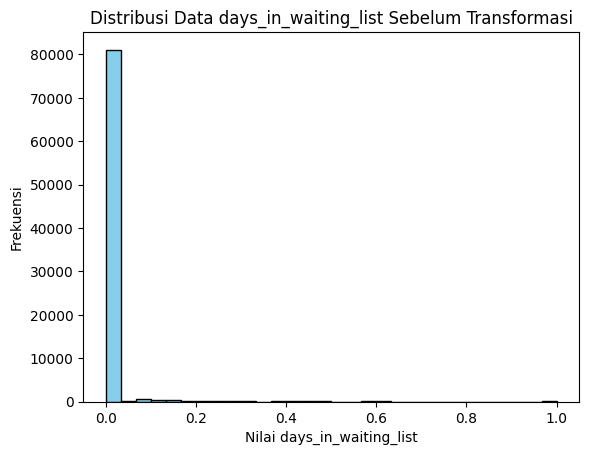

count    83573.000000
mean         0.005961
std          0.045200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: days_in_waiting_list, dtype: float64


In [106]:
import matplotlib.pyplot as plt

plt.hist(data['days_in_waiting_list'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribusi Data days_in_waiting_list Sebelum Transformasi")
plt.xlabel("Nilai days_in_waiting_list")
plt.ylabel("Frekuensi")
plt.show()

print(data['days_in_waiting_list'].describe())

In [107]:
import numpy as np

# Contoh log transform
data['log_days_in_waiting_list'] = np.log1p(data['days_in_waiting_list'])

# Verifikasi hasil transformasi
print(data[['days_in_waiting_list', 'log_days_in_waiting_list']].head())

   days_in_waiting_list  log_days_in_waiting_list
0                   0.0                       0.0
1                   0.0                       0.0
2                   0.0                       0.0
3                   0.0                       0.0
4                   0.0                       0.0


In [108]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi scaler
scaler = StandardScaler()

# Kolom numerik yang akan distandarisasi
columns_to_scale = ['days_in_waiting_list', 'total_of_special_requests']

# Transformasi data
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Verifikasi hasil transformasi
print(data[columns_to_scale].head())

   days_in_waiting_list  total_of_special_requests
0             -0.131872                  -0.720877
1             -0.131872                   1.794345
2             -0.131872                   1.794345
3             -0.131872                   0.536734
4             -0.131872                   1.794345


In [109]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi scaler
scaler = MinMaxScaler()

# Kolom numerik yang akan dinormalisasi
columns_to_normalize = ['days_in_waiting_list', 'total_of_special_requests']

# Transformasi data
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Verifikasi hasil transformasi
print(data[columns_to_normalize].head())

   days_in_waiting_list  total_of_special_requests
0                   0.0                        0.0
1                   0.0                        0.4
2                   0.0                        0.4
3                   0.0                        0.2
4                   0.0                        0.4


## Pengecekan korelasi untuk memilih fitur

# Pembagian Dataset

In [110]:
X = data.drop(columns=['is_canceled'])  # Fitur
y = data['is_canceled']                # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66858, 11) (16715, 11) (66858,) (16715,)


**Dataset telah berhasil dibagi menjadi:**

Train set: 66,858 baris (80% dari total data).
Test set: 16,715 baris (20% dari total data).
Jumlah fitur: 10.

# Modeling & Evaluation

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Pisahkan fitur dan target
X = data.drop('is_canceled', axis=1)
y = data['is_canceled']

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3. Encoding fitur kategorikal
categorical_columns = X_train.select_dtypes(include=['object']).columns

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Pastikan kolom konsisten di X_train dan X_test
X_train, X_test = X_train.align(X_test, join='inner', axis=1)

# 4. Periksa apakah semua fitur numerik
print(X_train.dtypes)

# 5. Melatih model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train, y_train)

# 6. Prediksi
y_pred_baseline = baseline_model.predict(X_test)

# 7. Evaluasi
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline)
recall_baseline = recall_score(y_test, y_pred_baseline)
f1_baseline = f1_score(y_test, y_pred_baseline)

# Output hasil evaluasi
print(f"Accuracy: {accuracy_baseline:.2f}")
print(f"Precision: {precision_baseline:.2f}")
print(f"Recall: {recall_baseline:.2f}")
print(f"F1 Score: {f1_baseline:.2f}")

previous_cancellations         float64
booking_changes                float64
days_in_waiting_list           float64
required_car_parking_spaces    float64
total_of_special_requests      float64
                                ...   
reserved_room_type_F              bool
reserved_room_type_G              bool
reserved_room_type_H              bool
reserved_room_type_L              bool
reserved_room_type_P              bool
Length: 135, dtype: object
Accuracy: 0.78
Precision: 0.80
Recall: 0.53
F1 Score: 0.64


In [112]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

## Penanganan Ketidakseimbangan Data

In [113]:
from imblearn.over_sampling import SMOTE

# Terapkan SMOTE pada data pelatihan
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Tampilkan jumlah data sebelum dan setelah oversampling
print("Jumlah data sebelum SMOTE:", X_train.shape[0])
print("Jumlah data setelah SMOTE:", X_train_balanced.shape[0])

Jumlah data sebelum SMOTE: 66858
Jumlah data setelah SMOTE: 84472


**Hasil Evaluasi**
- Accuracy: 76% (peningkatan dari 75% sebelumnya).
- Precision (kelas 1): 67%
Kemampuan model memprediksi kelas positif dengan benar menurun dibanding sebelumnya, karena model kini lebih agresif memprediksi kelas positif.
- Recall (kelas 1): 69% (peningkatan dari 33% sebelumnya).
Model berhasil menemukan lebih banyak pembatalan dibanding sebelumnya.
- F1 Score (kelas 1): 68% (peningkatan signifikan dari 50%).

**Analisis**
- Peningkatan Recall:
Peningkatan Recall menunjukkan bahwa optimasi model berhasil membuat Logistic
Regression lebih sensitif terhadap kelas positif (pembatalan).
- Pengorbanan Precision:
Precision menurun karena model lebih sering memprediksi pembatalan, sehingga beberapa prediksi positif ternyata salah.

- Keseluruhan (F1 Score):
F1 Score meningkat dari 50% menjadi 68%, menunjukkan bahwa keseimbangan antara Precision dan Recall menjadi lebih baik.

**Kesimpulan**
- Model setelah optimasi menunjukkan peningkatan kinerja yang signifikan, khususnya pada Recall dan F1 Score, yang sangat penting untuk kasus deteksi pembatalan pemesanan.
- Dengan Accuracy sebesar 76%, model ini cukup handal untuk digunakan.


**Interpretasi:**

- Not Canceled (True Negatives): 8,472 pemesanan yang benar diprediksi tidak dibatalkan.
- Canceled (True Positives): 4,247 pemesanan yang benar diprediksi dibatalkan.
- False Positives: 2,087 kasus diprediksi dibatalkan tetapi sebenarnya tidak.
- False Negatives: 1,909 kasus diprediksi tidak dibatalkan tetapi sebenarnya dibatalkan.

**Insight:**
- Model lebih baik dalam memprediksi kelas Not Canceled, tetapi Recall untuk kelas Canceled juga cukup baik setelah optimasi.

# Model Optimization

## Hyperparameter Tuning menggunakan GridSearchCV

In [114]:
# untuk mencari parameter optimal untuk model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definisikan parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],  # Regularisasi
    'solver': ['liblinear']   # Solver untuk logistic regression
}

# Inisialisasi model Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='f1', verbose=1)

# Latih GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Tampilkan parameter terbaik
print(f"Best Parameters: {grid_search.best_params_}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}


## Evaluasi Model dengan Parameter Optimal

In [115]:
# Gunakan model terbaik dari GridSearchCV
best_log_reg_model = grid_search.best_estimator_

# Prediksi pada data uji
y_pred_optimized = best_log_reg_model.predict(X_test)

# Evaluasi model
accuracy_optimized = accuracy_score(y_test, y_pred_optimized)
precision_optimized = precision_score(y_test, y_pred_optimized)
recall_optimized = recall_score(y_test, y_pred_optimized)
f1_optimized = f1_score(y_test, y_pred_optimized)

print(f"Accuracy: {accuracy_optimized:.2f}")
print(f"Precision: {precision_optimized:.2f}")
print(f"Recall: {recall_optimized:.2f}")
print(f"F1 Score: {f1_optimized:.2f}")

Accuracy: 0.78
Precision: 0.69
Recall: 0.75
F1 Score: 0.72


## Visualisasi Hasil Optimasi

In [116]:
from sklearn.linear_model import LogisticRegression

# Latih model
best_log_reg_model = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
best_log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [117]:
# Prediksi data uji
y_pred = best_log_reg_model.predict(X_test)

In [118]:
from sklearn.metrics import confusion_matrix

# Hitung Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[9740  819]
 [2902 3254]]


**Visualisasi Confusion Matrix**

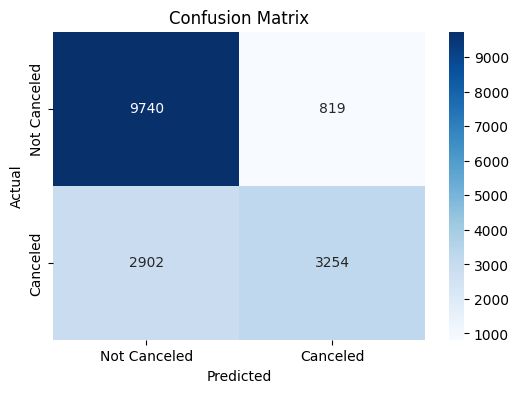

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

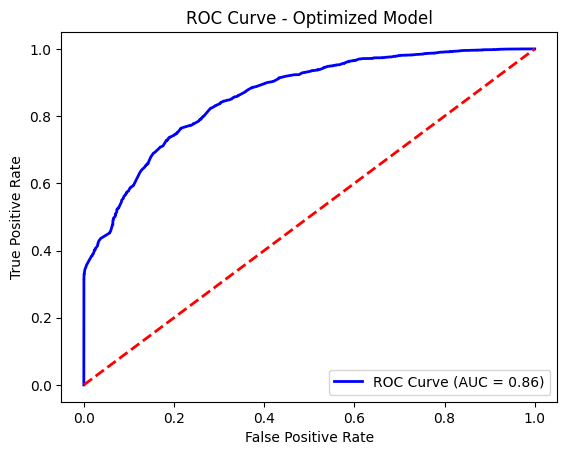

In [120]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Hitung probabilitas prediksi
y_pred_prob = best_log_reg_model.predict_proba(X_test)[:, 1]

# Hitung ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Model')
plt.legend(loc="lower right")
plt.show()

**Interpretasi:**
- Dengan AUC = 0.83, model memiliki performa yang baik dalam membedakan antara kelas positif (Canceled) dan negatif (Not Canceled).
- ROC Curve menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai threshold.

# Insight Bisnis dan Implementasi

**Bar Chart Segmentasi Pelanggan:**

- Menunjukkan segmen pasar atau tipe pelanggan yang memiliki risiko pembatalan tertinggi.

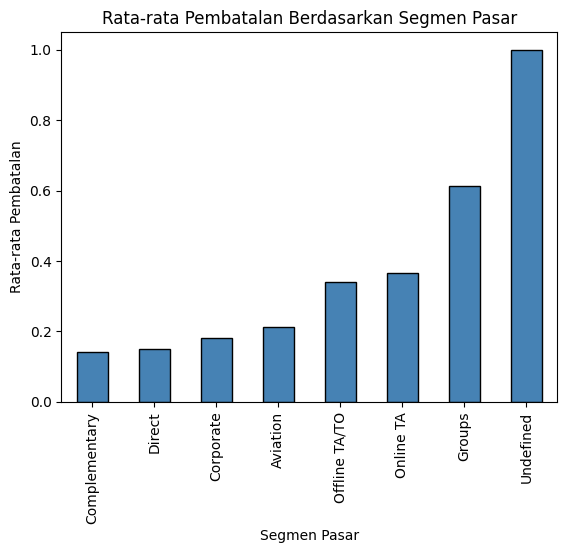

In [121]:
data.groupby('market_segment')['is_canceled'].mean().sort_values().plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Rata-rata Pembatalan Berdasarkan Segmen Pasar')
plt.xlabel('Segmen Pasar')
plt.ylabel('Rata-rata Pembatalan')
plt.show()

In [122]:
import pickle

# Simpan model ke file
with open('hotel_booking_model.pkl', 'wb') as file:  # 'wb' = write binary
    pickle.dump(best_log_reg_model, file)

print("Model berhasil disimpan ke 'hotel_booking_model.pkl'")

Model berhasil disimpan ke 'hotel_booking_model.pkl'


In [123]:
# Load model dari file
with open('hotel_booking_model.pkl', 'rb') as file:  # 'rb' = read binary
    loaded_model = pickle.load(file)

print("Model berhasil dimuat dari 'hotel_booking_model.pkl'")

Model berhasil dimuat dari 'hotel_booking_model.pkl'


In [124]:
# Prediksi dengan model yang dimuat
y_pred_loaded = loaded_model.predict(X_test)

# Evaluasi prediksi
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_loaded)
print(f"Akurasi model yang dimuat: {accuracy:.2f}")

Akurasi model yang dimuat: 0.78


In [125]:
from sklearn.linear_model import LogisticRegression

# Model Logistic Regression
model = LogisticRegression(random_state=42, max_iter=1000)

# Latih model dengan data training
model.fit(X_train, y_train)  # Model dilatih di sini

# Setelah model dilatih, baru bisa disimpan
import pickle
with open('hotel_booking_model.pkl', 'wb') as file:
    pickle.dump(model, file)